In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
color_pal = sns.color_palette()

# Override the default linewidth and markersize
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# ----------------------------------------------------------
# Others
import datetime as dt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [7]:
pop_nsw_path = ('/content/NSW estimated population.xlsx')
pop_nsw_df = pd.read_excel(pop_nsw_path)
pop_nsw_df = pop_nsw_df.set_index('Date')
pop_nsw_df.index = pd.to_datetime(pop_nsw_df.index)
pop_nsw_df

,Estimated Resident Population
Date,
1981-06-01,5234889
1981-09-01,5249455
1981-12-01,5266894
1982-03-01,5286119
1982-06-01,5303580
...,...
2022-03-01,8137688
2022-06-01,8166525
2022-09-01,8206865


In [8]:
data_demand = pd.read_csv('/content/merged_df.csv')
# Set 'DATETIME' as the index and convert it to DateTime type
data_demand.set_index('DATETIME', inplace=True)
data_demand.index = pd.to_datetime(data_demand.index)
data_demand

,REGIONID,TOTALDEMAND,LOCATION,TEMPERATURE
DATETIME,,,,
2010-01-01 00:00:00,NSW1,7997.41,94766,23.1
2010-01-01 00:30:00,NSW1,7683.34,94766,22.9
2010-01-01 00:50:00,NSW1,7497.55,94766,22.7
2010-01-01 01:00:00,NSW1,7270.08,94766,22.6
2010-01-01 01:30:00,NSW1,6961.98,94766,22.5
...,...,...,...,...
2022-07-31 22:00:00,NSW1,9009.20,94766,14.0
2022-07-31 22:30:00,NSW1,8700.90,94766,13.2
2022-07-31 23:00:00,NSW1,8378.96,94766,13.3


In [9]:
# Filter the DataFrame to only include data from 2010 onwards
pop_df_filtered = pop_nsw_df[pop_nsw_df.index >= '2010-01-01']
pop_df_filtered

,Estimated Resident Population
Date,
2010-03-01,7128356
2010-06-01,7144292
2010-09-01,7162726
2010-12-01,7179891
2011-03-01,7204737
2011-06-01,7218529
2011-09-01,7239528
2011-12-01,7258722
2012-03-01,7284982


In [10]:
import pandas as pd

# Assume df is your DataFrame
# If 'DATETIME' is not the index, set it first: df.set_index('DATETIME', inplace=True)

# Filter the DataFrame to only include data from March 1, 2010, and onwards
filtered_data = data_demand[data_demand.index >= '2010-03-01']

# Select just the 'TOTALDEMAND' column
selected_data = filtered_data[['TOTALDEMAND']]

# Resample the data to quarterly, setting label and closed to 'left'
quarterly_data = selected_data.resample('Q', label='left', closed='left').mean()

# Now the index will start from 2010-03-01
quarterly_data

,TOTALDEMAND
DATETIME,
2009-12-31,8686.532938
2010-03-31,8819.441621
2010-06-30,9178.195912
2010-09-30,8265.642291
2010-12-31,8860.198594
2011-03-31,8891.027844
2011-06-30,9020.622693
2011-09-30,8117.514549
2011-12-31,8254.392142


In [11]:
# Sort both indices before merging
pop_df_filtered.sort_index(inplace=True)
quarterly_data.sort_index(inplace=True)

# Perform the asof merge
merged_df = pd.merge_asof(quarterly_data, pop_df_filtered, left_index=True, right_index=True)
merged_df.drop(merged_df.index[0], inplace=True)
merged_df

,TOTALDEMAND,Estimated Resident Population
DATETIME,,
2010-03-31,8819.441621,7128356.0
2010-06-30,9178.195912,7144292.0
2010-09-30,8265.642291,7162726.0
2010-12-31,8860.198594,7179891.0
2011-03-31,8891.027844,7204737.0
2011-06-30,9020.622693,7218529.0
2011-09-30,8117.514549,7239528.0
2011-12-31,8254.392142,7258722.0
2012-03-31,8567.370657,7284982.0


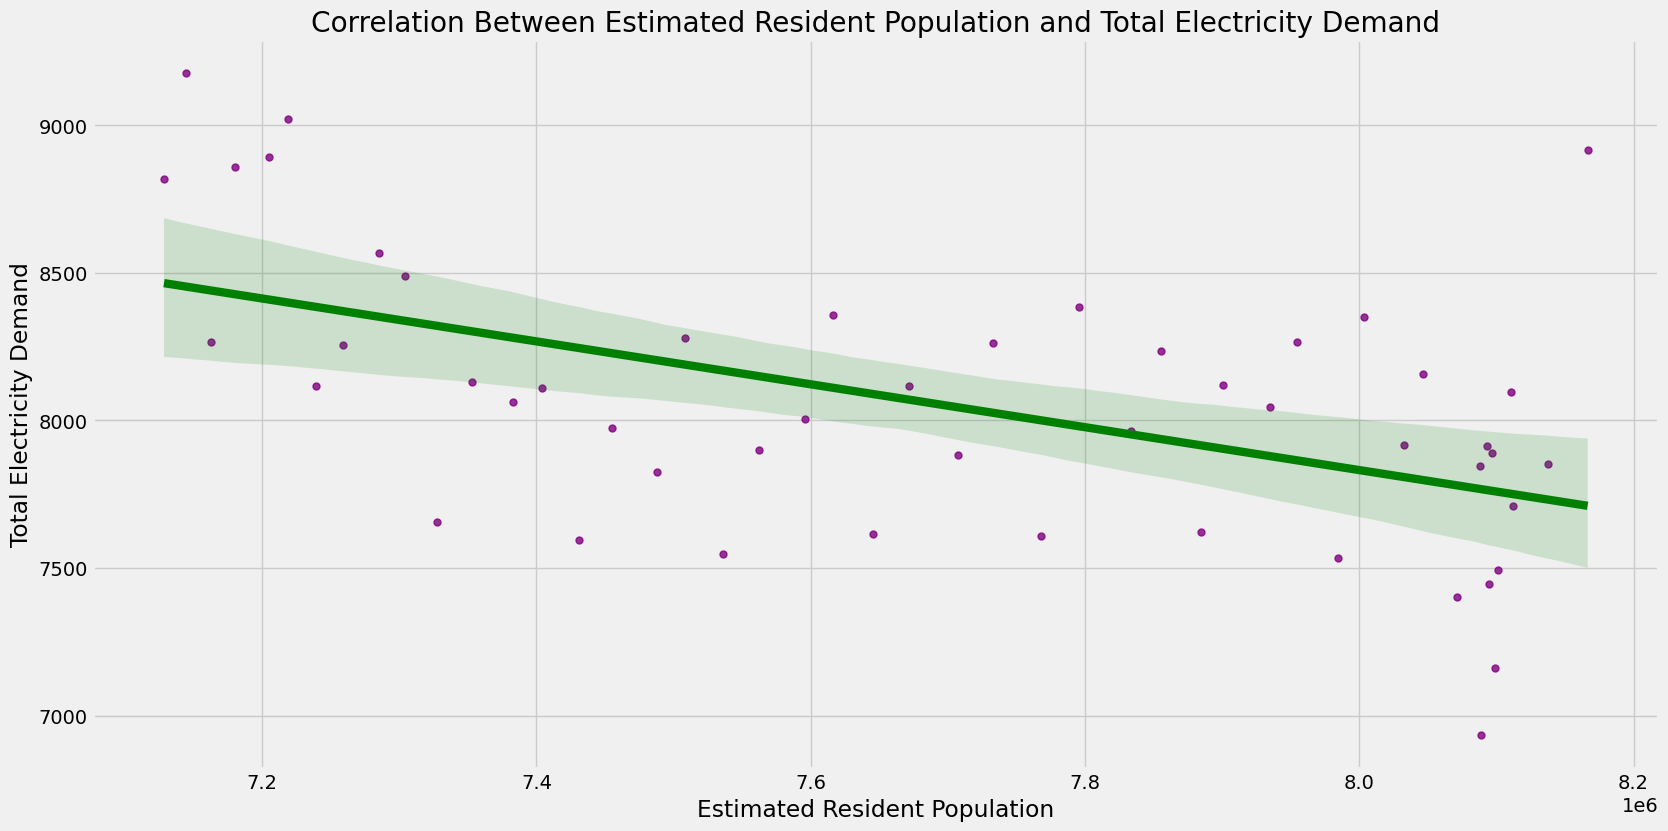

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 9))  # Making the plot wider and taller

# Create a scatter plot with regression line
sns.regplot(x='Estimated Resident Population', y='TOTALDEMAND', data=merged_df,
            scatter_kws={'color': 'purple'},  # Setting scatter plot color to purple
            line_kws={'color': 'green'})  # Setting line color to green

# Add labels and title
plt.xlabel('Estimated Resident Population')
plt.ylabel('Total Electricity Demand')
plt.title('Correlation Between Estimated Resident Population and Total Electricity Demand')

# Show the plot
plt.show()


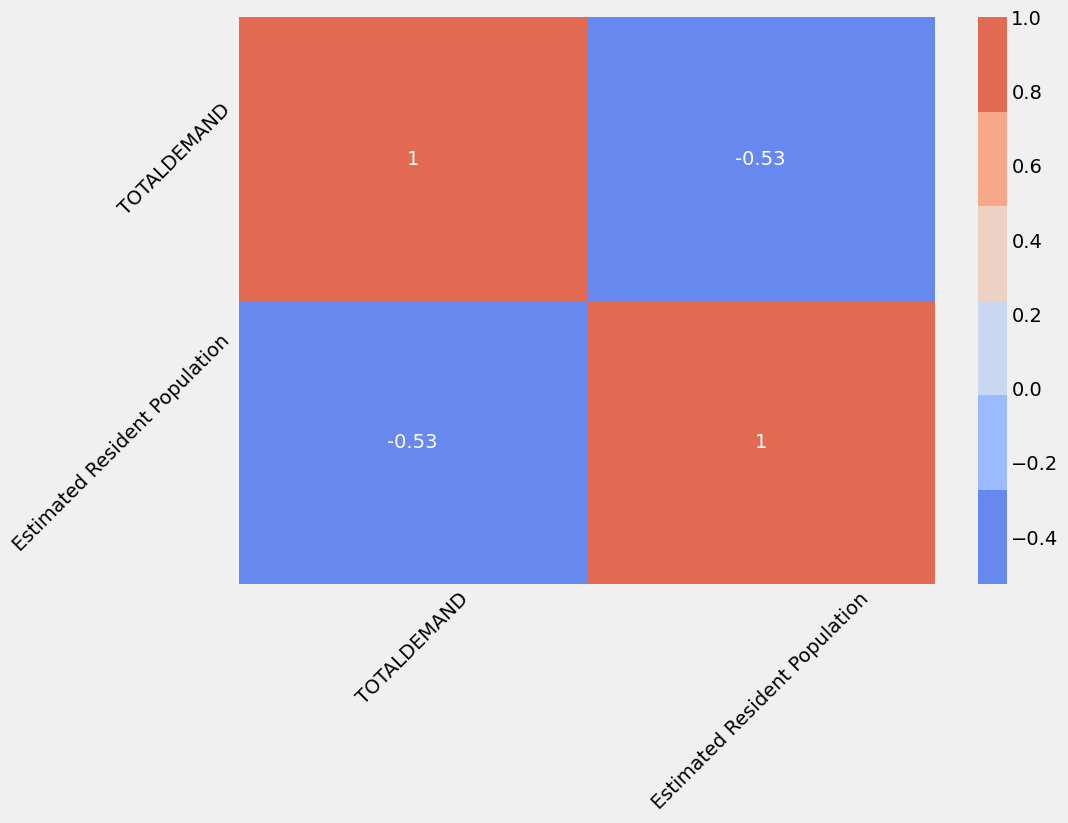

In [13]:
# Calculate the correlation matrix
corr_matrix = merged_df.corr()

# Set the figure size
plt.figure(figsize=(10, 7))

# Create a heatmap with annotations and a custom color map
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("coolwarm"))

# Rotate x and y tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

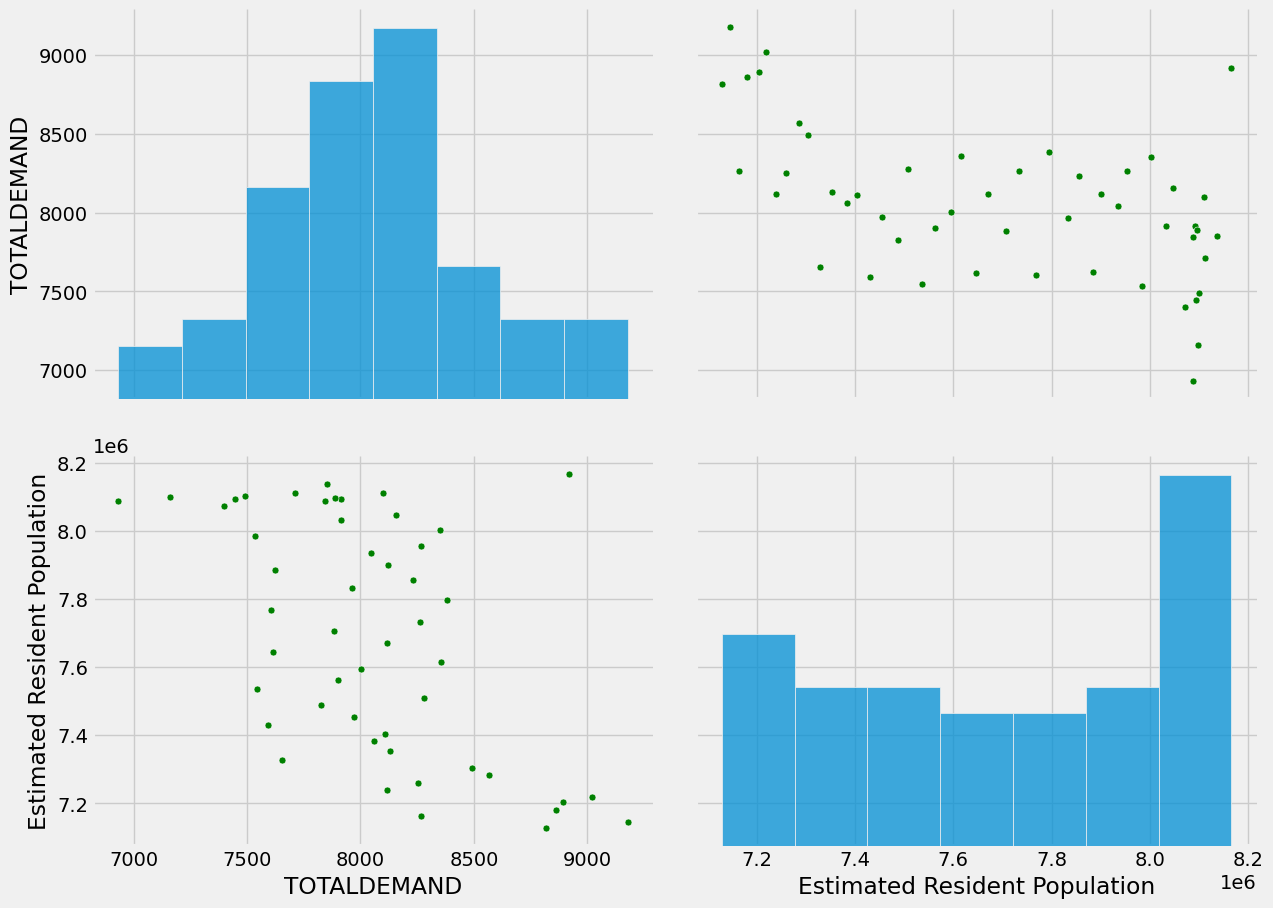

In [14]:
# Assume merged_df is your DataFrame
sns.pairplot(merged_df, height=2.5, plot_kws={"color": "green"})

# Adjust the size of the entire pairplot
plt.gcf().set_size_inches(15, 10)

plt.show()

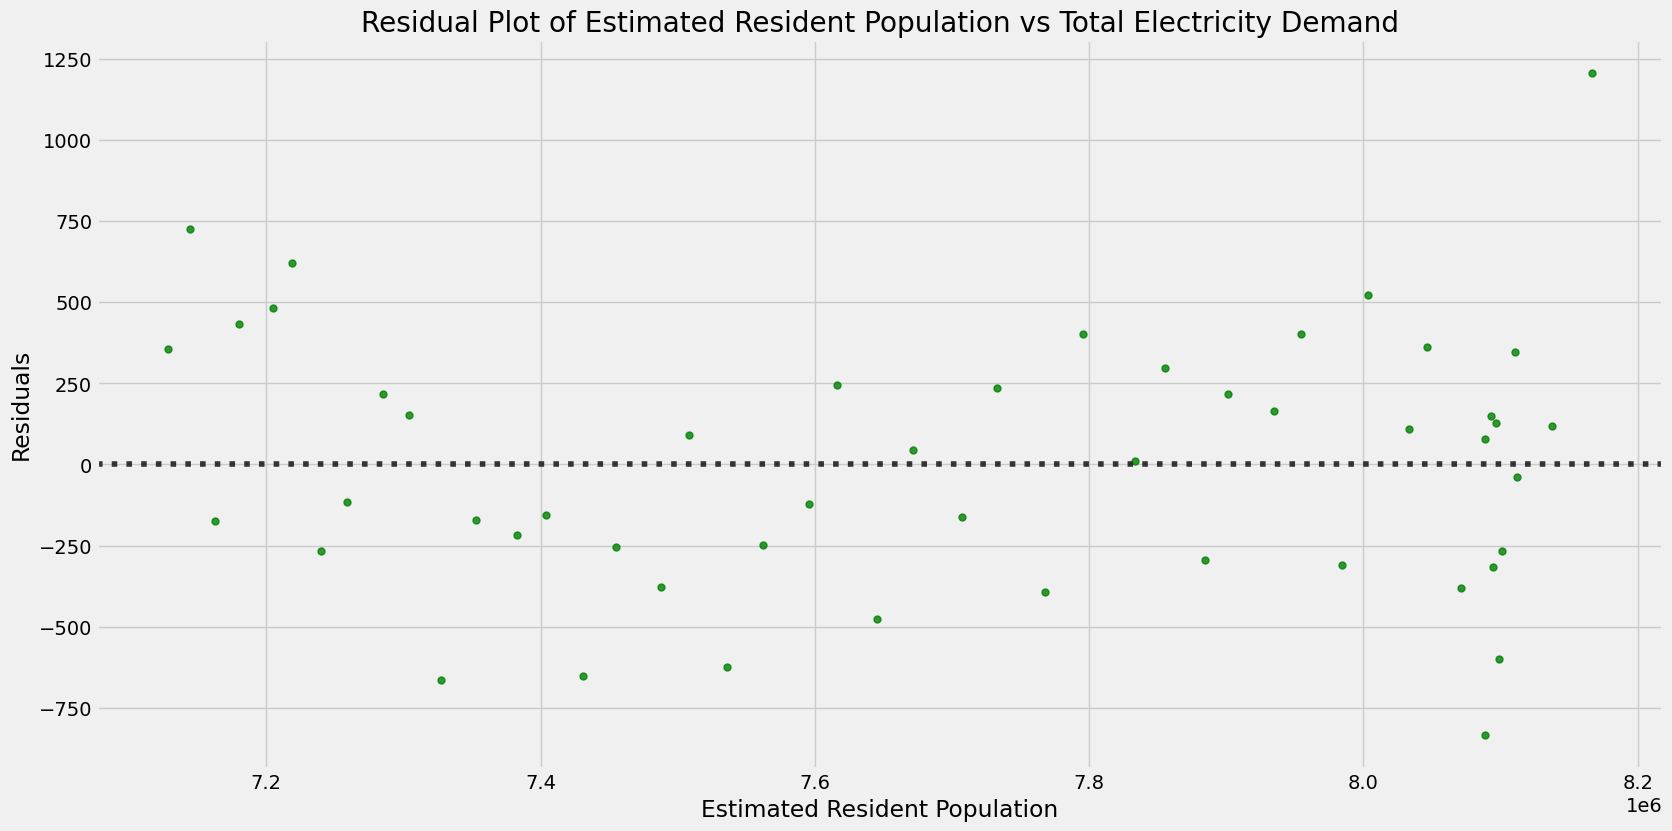

In [15]:
# Set the figure size
plt.figure(figsize=(18, 9))  # Making the plot wider and taller

# Create a residual plot
sns.residplot(x='Estimated Resident Population', y='TOTALDEMAND', data=merged_df, color='green')

# Add labels and title
plt.xlabel('Estimated Resident Population')
plt.ylabel('Residuals')
plt.title('Residual Plot of Estimated Resident Population vs Total Electricity Demand')

# Show the plot
plt.show()

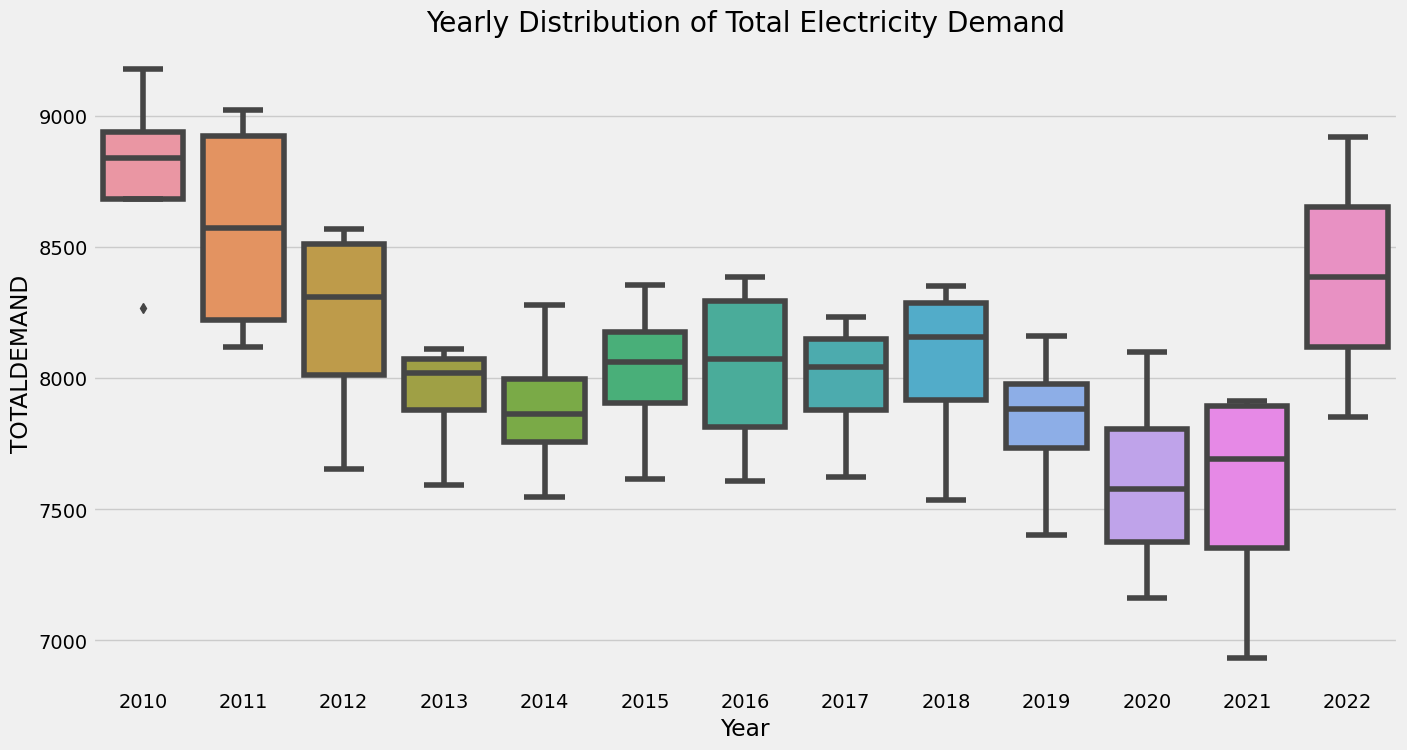

In [17]:
# Set the figure size
plt.figure(figsize=(15, 8))
# Adding a Year column by extracting it from the DATETIME index
merged_df['Year'] = merged_df.index.year

# Create the boxplot
sns.boxplot(x='Year', y='TOTALDEMAND', data=merged_df)

# Add a title
plt.title('Yearly Distribution of Total Electricity Demand')

# Show the plot
plt.show()